In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns 

In [2]:
from platform import python_version
print(python_version())

3.8.2


In [3]:
import lasio

In [4]:
las1=lasio.read(r"C:\Users\Aman Kumar\Desktop\IW-1_S3_R4_UBI-GR-OBMI-MSIP-PPC_Main _Relabeled_003PUC.las")
las2=lasio.read(r"C:\Users\Aman Kumar\Desktop\IW-1_S2_R1_AIT-APS-LDS-LDT-HNGS_Main.las")

In [5]:
df1=las1.df()
df2=las2.df()

In [6]:
#for count,curve in enumerate(las1.curves):
    # print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit},\t Description:{curve.descr}")

In [7]:
print(las1.curves)

Mnemonic   Unit  Value  Description                                        
--------   ----  -----  -----------                                        
DEPT       M            DEPTH (BOREHOLE) {F10.4}                           
CDF        N            Calibrated Downhole Force {F13.4}                  
DTCO       US/F         Delta-T Compressional {F13.4}                      
DTCO3      US/F         Compressional Slowness from Measurement 3 {F13.4}  
DTSH5      US/F         Shear Slowness from Measurement 5 {F13.4}          
DTSH6      US/F         Shear Slowness from Measurement 6 {F13.4}          
DTSM       US/F         Delta-T Shear {F13.4}                              
HD1_PPC1   IN           PPC1 Hole Diameter 1 {F13.4}                       
HD2_PPC1   IN           PPC1 Hole Diameter 2 {F13.4}                       
SPHI       V/V          Sonic Porosity {F13.4}                             
TENS:1     LBF          Cable Tension {F13.4}                              
ANOR       M

In [8]:
print(las2.curves)

Mnemonic  Unit  Value  Description                                                       
--------  ----  -----  -----------                                                       
DEPT      M            DEPTH (BOREHOLE) {F10.4}                                          
AF10      OHMM         Array Induction Four Foot Resistivity A10 {F13.4}                 
AF20      OHMM         Array Induction Four Foot Resistivity A20 {F13.4}                 
AF30      OHMM         Array Induction Four Foot Resistivity A30 {F13.4}                 
AF60      OHMM         Array Induction Four Foot Resistivity A60 {F13.4}                 
AF90      OHMM         Array Induction Four Foot Resistivity A90 {F13.4}                 
ANOR      M/S2         Acceleration Computed Norm {F13.4}                                
AO10      OHMM         Array Induction One Foot Resistivity A10 {F13.4}                  
AO20      OHMM         Array Induction One Foot Resistivity A20 {F13.4}                  
AO30      

In [9]:
df1.reset_index(inplace=True)
df1.rename(columns={'DEPT':'DEPTH'},inplace=True)

In [10]:
df2.reset_index(inplace=True)
df2.rename(columns={'DEPT':'DEPTH'},inplace=True)            

In [11]:
data1=df1[df1['DEPTH']>=4133.7] [df1['DEPTH']<=4239.7] #Brewester Member
data2=df2[df2['DEPTH']>=4133.7] [df2['DEPTH']<=4239.72]

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_11136\1680967077.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1=df1[df1['DEPTH']>=4133.7] [df1['DEPTH']<=4239.7] #Brewester Member
C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_11136\1680967077.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2=df2[df2['DEPTH']>=4133.7] [df2['DEPTH']<=4239.72]


## plot basic and quality control

In [12]:
dt=data1['DTCO3']
ds=data1['DTSM']
p=304800/dt
s=304800/ds

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_11136\2726347547.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((1,7),(0,0),rowspan=1,colspan=1)


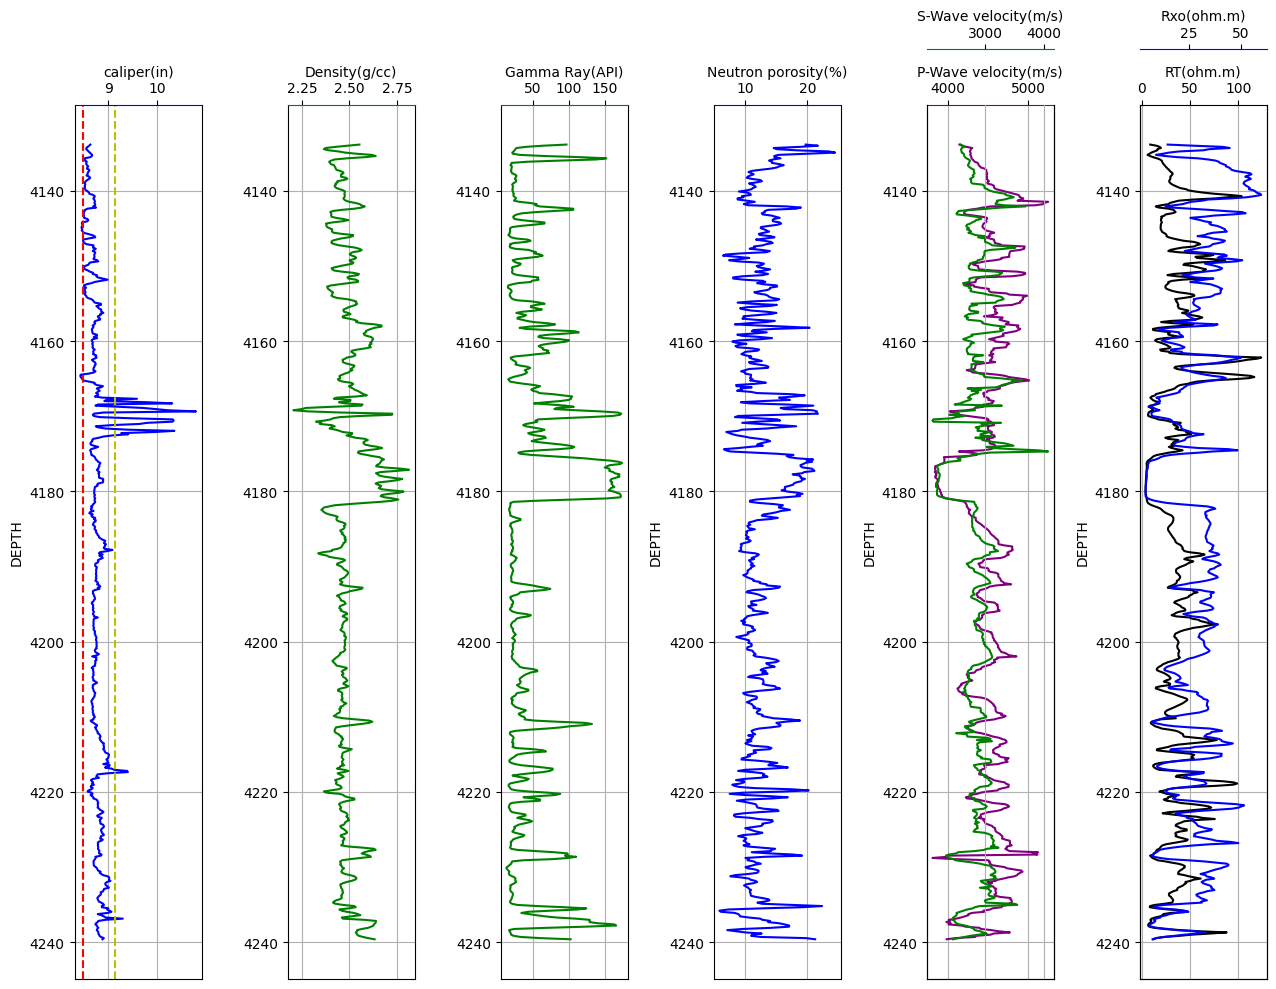

In [13]:
fig,axes=plt.subplots(figsize=(15,10))
ax1=plt.subplot2grid((1,7),(0,0),rowspan=1,colspan=1)
ax2=plt.subplot2grid((1,7),(0,1),rowspan=1,colspan=1)
ax3=plt.subplot2grid((1,7),(0,2),rowspan=1,colspan=1)
ax4=plt.subplot2grid((1,7),(0,3),rowspan=1,colspan=1)
ax5=plt.subplot2grid((1,7),(0,4),rowspan=1,colspan=1)
ax7=plt.subplot2grid((1,7),(0,5),rowspan=1,colspan=1)

ax6=ax5.twiny()
ax8=ax7.twiny()

ax1.plot("CALI","DEPTH",data=data2,color='blue')
ax1.invert_yaxis()
ax1.axvline(x=8.5,c='r',ls='--')
ax1.axvline(x=9.15,c='y',ls='--')
ax1.set_ylabel('DEPTH')
ax1.set_xlabel('caliper(in)')
ax1.spines['top'].set_edgecolor('blue')
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position("top")
ax1.grid()


ax2.plot("RHOB","DEPTH",data=data2,color='green')
ax2.invert_yaxis()
ax2.set_ylabel('DEPTH',visible=False)
ax2.set_xlabel('Density(g/cc)')
ax2.spines['top'].set_edgecolor('green')
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position("top")
ax2.grid()


ax3.plot("GR","DEPTH",data=data1,color='green')
ax3.invert_yaxis()
ax3.set_ylabel('DEPTH',visible=False)
ax3.set_xlabel('Gamma Ray(API)')
ax3.spines['top'].set_edgecolor('green')
ax3.xaxis.set_ticks_position('top')
ax3.xaxis.set_label_position("top")
ax3.grid()

ax4.plot(data2.APSC*100,"DEPTH",data=data2,color='blue')
ax4.invert_yaxis()
ax4.set_ylabel('DEPTH')
ax4.set_xlabel('Neutron porosity(%)')
ax4.spines['top'].set_edgecolor('blue')
ax4.xaxis.set_ticks_position("top")
ax4.xaxis.set_label_position("top")
ax4.grid()

ax5.plot(p,"DEPTH",data=data1,color='purple')
ax5.invert_yaxis()
ax5.set_ylabel('DEPTH')
ax5.set_xlabel('P-Wave velocity(m/s)')
ax5.spines['top'].set_edgecolor('purple')
ax5.spines["top"].set_position(("outward", 0))
ax5.xaxis.set_ticks_position("top")
ax5.xaxis.set_label_position("top")
ax5.grid()

ax6.plot(s,"DEPTH",data=data1,color='green')
ax6.set_ylabel('DEPTH')
ax6.set_xlabel('S-Wave velocity(m/s)')
ax6.spines['top'].set_edgecolor('green')
ax6.xaxis.set_ticks_position("top")
ax6.xaxis.set_label_position("top")
ax6.spines["top"].set_position(("outward", 40))
ax6.grid()



ax7.plot("ATRT","DEPTH",data=data2,color='black')
ax7.invert_yaxis()
ax7.semilogx
ax7.set_ylabel('DEPTH')
ax7.set_xlabel('RT(ohm.m)')
ax7.spines['top'].set_edgecolor('black')
ax7.spines["top"].set_position(("outward", 0))
ax7.xaxis.set_ticks_position("top")
ax7.xaxis.set_label_position("top")
ax7.grid()



ax8.plot("ATRX","DEPTH",data=data2,color='blue')
ax8.semilogx
ax8.xaxis.set_ticks_position("top")
ax8.xaxis.set_label_position("top")
ax8.set_ylabel('DEPTH')
ax8.set_xlabel('Rxo(ohm.m)')
ax8.spines['top'].set_edgecolor('blue')
ax8.spines["top"].set_position(("outward", 40))

plt.tight_layout()

## mark outlier

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_11136\1248914147.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((3,3),(0,0),rowspan=1,colspan=1)
C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_11136\1248914147.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax9=plt.subplot2grid((3,3),(2,1),rowspan=1,colspan=1)


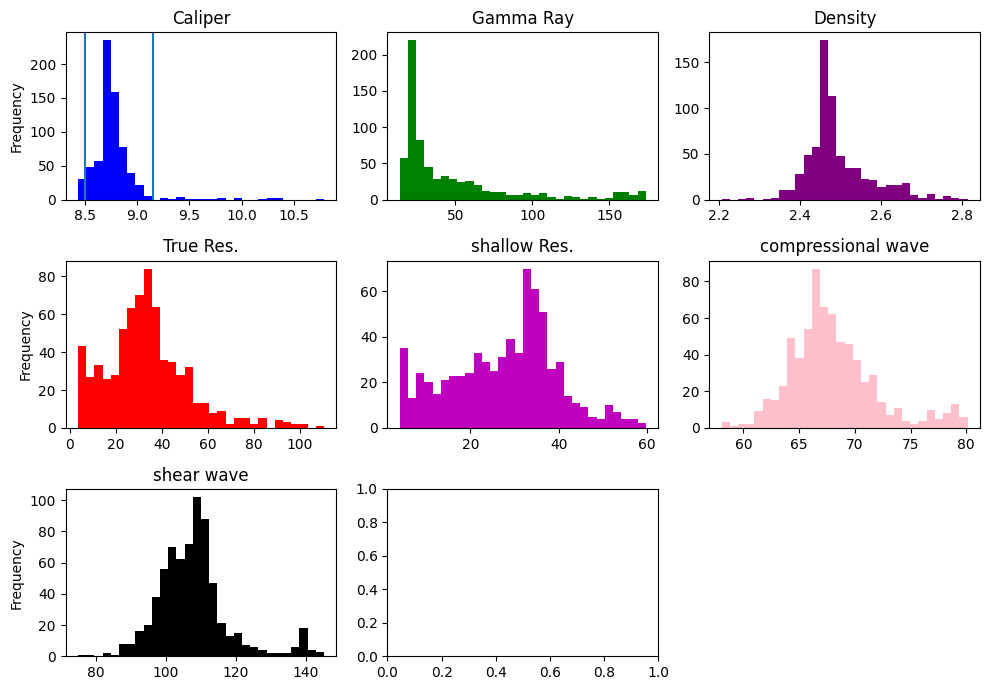

In [14]:
fig,axes=plt.subplots(figsize=(10,7))
ax1=plt.subplot2grid((3,3),(0,0),rowspan=1,colspan=1)
ax2=plt.subplot2grid((3,3),(0,1),rowspan=1,colspan=1)
ax3=plt.subplot2grid((3,3),(0,2),rowspan=1,colspan=1)
ax4=plt.subplot2grid((3,3),(1,0),rowspan=1,colspan=1)
ax5=plt.subplot2grid((3,3),(1,1),rowspan=1,colspan=1)
ax6=plt.subplot2grid((3,3),(1,2),rowspan=1,colspan=1)
ax7=plt.subplot2grid((3,3),(2,0),rowspan=1,colspan=1)
ax8=plt.subplot2grid((3,3),(2,1),rowspan=1,colspan=1)
ax9=plt.subplot2grid((3,3),(2,1),rowspan=1,colspan=1)

ax1.hist(data2.CALI,color='blue',bins=30)
ax1.axvline(8.5)
ax1.axvline(9.15)
ax1.set_ylabel('Frequency')
ax1.set_title('Caliper')

ax2.hist(data1.GR,color='green',bins=30)
ax2.set_title('Gamma Ray')

ax3.hist(data2.RHOB,color='purple',bins=30)
ax3.set_title('Density')

ax4.hist(data2.RT,color='red',bins=30)
ax4.set_ylabel('Frequency')
ax4.set_title('True Res.')

ax5.hist(data2.ATRX,color='m',bins=30)
ax5.set_title('shallow Res.')

ax6.hist(data1.DTCO3,color='pink',bins=30)
ax6.set_title('compressional wave')

ax7.hist(data1.DTSM,color='k',bins=30)
ax7.set_ylabel('Frequency')
ax7.set_title('shear wave')

#ax8.hist(data2.APSC,color='green',bins=30)
#ax8.set_title('NPHI')

plt.tight_layout()

## calculate volume of shale and total porosity

In [15]:
p15 = data1['GR'].quantile(0.05)
p195 = data1['GR'].quantile(0.95)
Igr=(data1['GR']-p15)/(p195-p15) #volume of shale
V_sh=1.7-(3.38-(Igr+0.7)**2)**(1/2)
V_sh

3429    0.412705
3430    0.162900
3431    0.050016
3432    0.016751
3433    0.005884
          ...   
4119    0.024257
4120    0.029646
4121    0.076628
4122    0.179182
4123    0.371070
Name: GR, Length: 695, dtype: float64

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_11136\1556941991.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((1,1),(0,0))


Text(0.5, 1.0, 'Gamma Ray(API)')

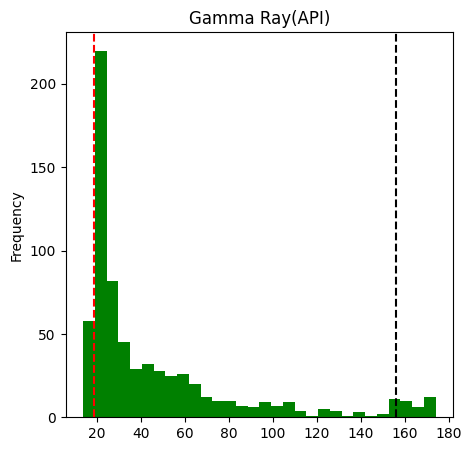

In [16]:
fig,axes=plt.subplots(figsize=(5,5))
ax1=plt.subplot2grid((1,1),(0,0))
ax1.hist(data1.GR,color='green',bins=30)
ax1.axvline(p15,c='r',ls='--')
ax1.axvline(p195,c='k',ls='--')
ax1.set_ylabel('Frequency')
ax1.set_title('Gamma Ray(API)')


In [17]:
pfl=1.01 # fluid density
dphi=data2['DPHI']
nphi=data2['APSC']
phi_t=(dphi+nphi)/2
phi_t

229    0.12885
230    0.13150
231    0.10295
232    0.10155
233    0.10460
        ...   
919    0.17600
920    0.17070
921    0.17660
922    0.17230
923    0.14455
Length: 695, dtype: float64

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_11136\4230273784.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((1,2),(0,0))


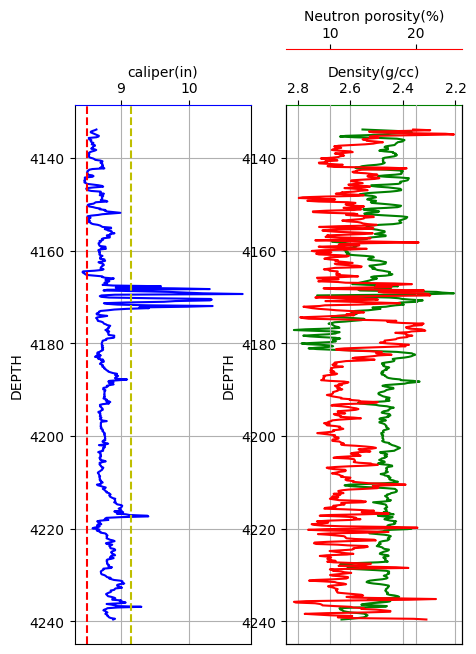

In [18]:
fig,axes=plt.subplots(figsize=(5,7))
ax1=plt.subplot2grid((1,2),(0,0))
ax2=plt.subplot2grid((1,2),(0,1))
ax3=ax2.twiny()

ax1.plot("CALI","DEPTH",data=data2,color='blue')
ax1.invert_yaxis()
ax1.axvline(x=8.5,c='r',ls='--')
ax1.axvline(x=9.15,c='y',ls='--')
ax1.set_ylabel('DEPTH')
ax1.set_xlabel('caliper(in)')
ax1.spines['top'].set_edgecolor('blue')
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position("top")
ax1.grid()



ax2.plot("RHOB","DEPTH",data=data2,color='green')
ax2.invert_xaxis()
ax2.invert_yaxis()

ax2.set_ylabel('DEPTH')
ax2.set_xlabel('Density(g/cc)')
ax2.spines['top'].set_edgecolor('green')
ax2.spines["top"].set_position(("outward", 0))
ax2.xaxis.set_ticks_position("top")
ax2.xaxis.set_label_position("top")
ax2.grid()

ax3.plot(data2.APSC*100,"DEPTH",data=data2,color='red')
ax3.set_ylabel('DEPTH')
ax3.set_xlabel('Neutron porosity(%)')

ax3.spines['top'].set_edgecolor('red')
ax3.spines["top"].set_position(("outward", 40))
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")
ax3.grid()



## 3. mark the zone of high porosity

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_11136\1383118009.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((1,4),(0,0),rowspan=1,colspan=1)


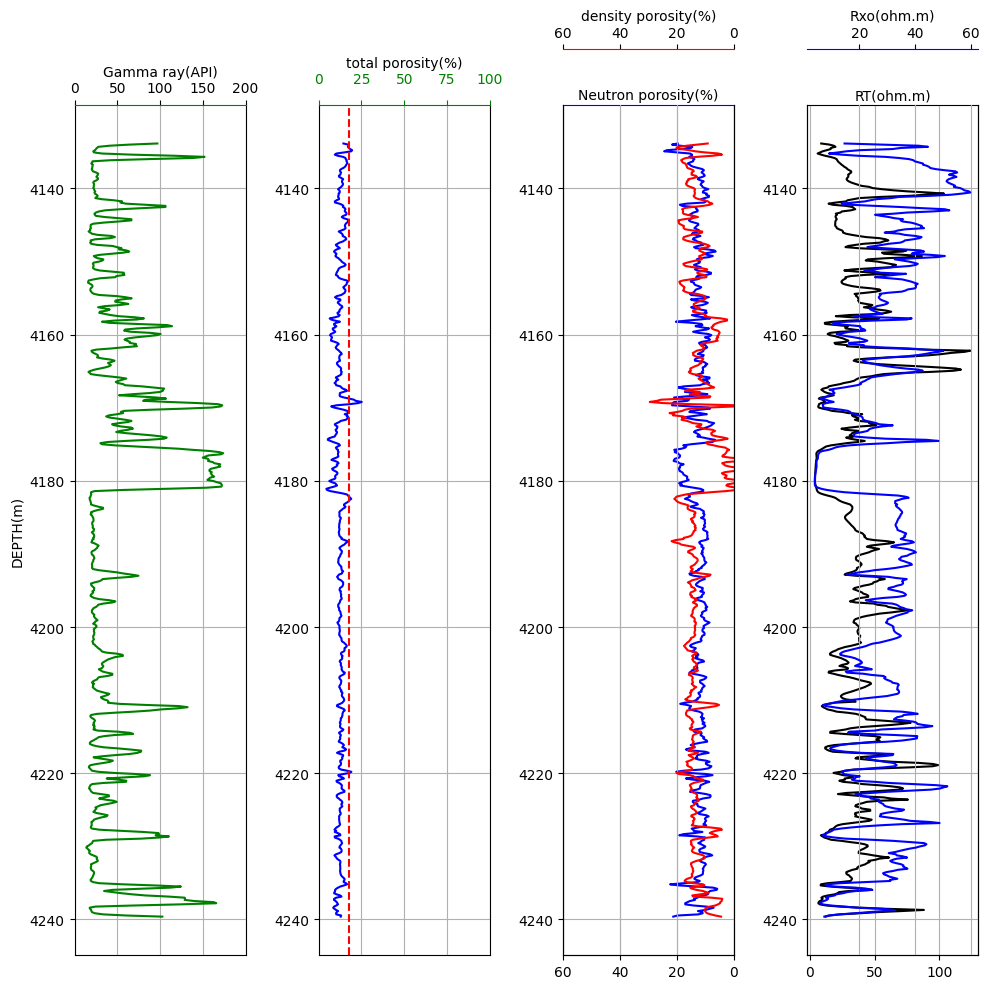

In [19]:
fig,axes=plt.subplots(figsize=(10,10))
ax1=plt.subplot2grid((1,4),(0,0),rowspan=1,colspan=1)
ax1.plot("GR","DEPTH",data=data1,color='green')
ax1.invert_yaxis()
ax1.set_xlim(0,200)
ax1.set_ylabel('DEPTH(m)')
ax1.set_xlabel('Gamma ray(API)')
ax1.spines['top'].set_edgecolor('green')
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position("top")
ax1.grid()

ax2=plt.subplot2grid((1,4),(0,1),rowspan=1,colspan=1)
ax2.plot(phi_t*100,"DEPTH",data=data1,color='blue')
ax2.invert_yaxis()
ax2.axvline(17.49,color='r',ls='--')
ax2.set_xlim(0,100)
ax2.set_ylabel('DEPTH',visible=False)
ax2.set_xlabel('total porosity(%)')
ax2.spines['top'].set_edgecolor('green')
ax2.tick_params(axis='x', colors= 'green',pad=10)
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position("top")
ax2.grid()

ax3=plt.subplot2grid((1,4),(0,2),rowspan=1,colspan=1)
ax3.plot(data2.APSC*100,"DEPTH",data=data2,color='blue')
ax3.set_xlim(0,60)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_ylabel('DEPTH',visible=False)
ax3.set_xlabel('Neutron porosity(%)')
ax3.spines['top'].set_edgecolor('blue')
ax3.spines["top"].set_position(("outward", 0))
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")
ax3.grid()

ax4=ax3.twiny()               
ax4.plot(data2.DPHI*100,"DEPTH",data=data2,color='red')

ax4.set_xlim(0,60)
ax4.invert_xaxis()
ax4.set_ylabel('DEPTH(m)')
ax4.set_xlabel('density porosity(%)')
ax4.spines['top'].set_edgecolor('red')
ax4.xaxis.set_ticks_position('top')
ax4.xaxis.set_label_position("top")
ax4.spines["top"].set_position(("outward", 40))
ax4.grid()

ax5=plt.subplot2grid((1,4),(0,3),rowspan=1,colspan=1)
ax5.plot("ATRT","DEPTH",data=data2,color='black')
ax5.invert_yaxis()
ax5.semilogx
ax5.set_ylabel('DEPTH',visible=False)
ax5.set_xlabel('RT(ohm.m)')
ax5.spines['top'].set_edgecolor('black')
ax5.spines["top"].set_position(("outward", 0))
ax5.xaxis.set_ticks_position("top")
ax5.xaxis.set_label_position("top")
ax5.grid()


ax6=ax5.twiny()
ax6.plot("ATRX","DEPTH",data=data2,color='blue')
ax6.semilogx
ax6.xaxis.set_ticks_position("top")
ax6.xaxis.set_label_position("top")
ax6.set_ylabel('DEPTH',visible=False)
ax6.set_xlabel('Rxo(ohm.m)')
ax6.spines['top'].set_edgecolor('blue')
ax6.spines["top"].set_position(("outward", 40))


ax6.grid()
plt.tight_layout()

In [20]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [21]:
#fig=go.Figure(data=go.Scatter(x=data1['GR'],y=data1['DEPTH']))
#fig.show()

In [22]:
#fig=px.line(df1,x='DEPTH',y='GR',range_x=[4133,4239],range_y=[0,200])
#fig.show()
#fig.update_xaxes(rangeslider_visible=True)

## creating log plots with make _subplots()

In [23]:
#fig=make_subplots()
#fig=make_subplots(rows=1,cols=3,shared_yaxes=True)
#fig.add_trace(go.Scatter(x=data2['DEPTH'],y=data2['RT']),row=1,col=1)
##
#fig.add_trace(go.Scatter(x=data2['ATRX'],y=data2['DEPTH']),row=1,col=1)
#fig.update_xaxes(title_text='res',row=1,col=1)
#fig.update_yaxes(title_text='DEPTH',row=1,col=1,autorange='reversed')

#fig.show()

In [24]:
#from plotly.subplots import make_subplots

#fig = make_subplots(rows=1, cols=2)

#fig.add_trace(go.Scatter(y=[4, 2, 1], mode="lines"), row=1, col=1)
#fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)

#fig.show()

In [25]:
#px.scatter(data2,x='RHOB',y='APSC',color=data1['GR'])

In [26]:
#px.scatter(data2,x='RHOB',y='APSC',color=data1['GR'],marginal_x='histogram')

In [27]:
#fig=px.scatter(x=data2['APSC'],y=phi_t,color=data1['GR'])
#fig.update_xaxes(title_text='NPHI',row=1,col=1)
#fig.update_yaxes(title_text='porosity',row=1,col=1)
#fig.show()

## plot velocity depth profile (compressional ans shear) colour coded

In [28]:
dt=data1['DTCO3']
ds=data1['DTSM']
p=304800/dt
s=304800/ds
#fig=px.scatter(x=p,y=data1['DEPTH'],color=V_sh,height=800,width=400)
#fig.update_layout(xaxis_title='Compressional',yaxis_title='Depth')
#fig.show()
#fig1=plt.scatter(x=p,y=data1['DEPTH'],c=V_sh,marker='o',s=100,edgecolors='w',cmap='jet',vmin=0,vmax=150)
#plt.scatter(logs.NPHI, logs.RHOB, c = logs.GR, marker='o', s=100, edgecolors='w', cmap='jet', vmin=0, vmax=150)
#plt.colorbar()
#plt.show()

In [29]:
#fig=px.scatter(x=s,y=data1['DEPTH'],color=V_sh,height=800,width=400)
#fig.update_layout(xaxis_title='Shear',yaxis_title='Depth')
#fig.show()

## color coded with volume of shale

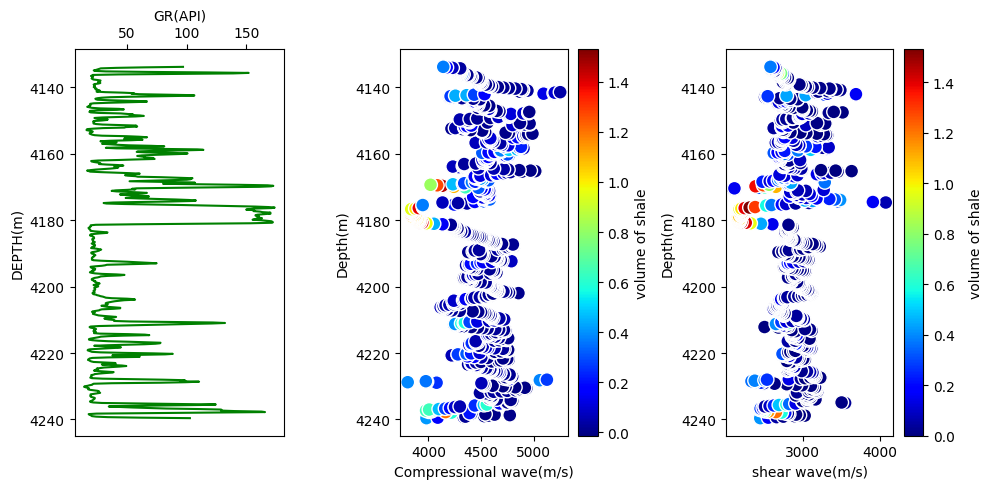

In [30]:
a=V_sh.min()
b=V_sh.max()
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.plot(data1.GR,data1.DEPTH,color='green')
plt.xlabel('GR(API)');plt.ylabel('DEPTH(m)')
plt.gca().invert_yaxis()
ax1=plt.gca()
ax1.xaxis.set_ticks_position("top")
ax1.xaxis.set_label_position("top")
    
plt.subplot(1,3,2)
plt.scatter(x=p,y=data1['DEPTH'],c=V_sh,marker='o',s=100,edgecolors='w',cmap='jet',vmin=min(V_sh),vmax=max(V_sh),alpha=1)
plt.xlabel('Compressional wave(m/s)');plt.ylabel('Depth(m)')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('volume of shale')

plt.subplot(1,3,3)
plt.scatter(x=s,y=data1['DEPTH'],c=V_sh,marker='o',s=100,edgecolors='w',cmap='jet',vmin=0,vmax=b,alpha=1)
plt.xlabel('shear wave(m/s)');plt.ylabel('Depth(m)')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('volume of shale',labelpad=10)

plt.tight_layout()

## color coded with porosity

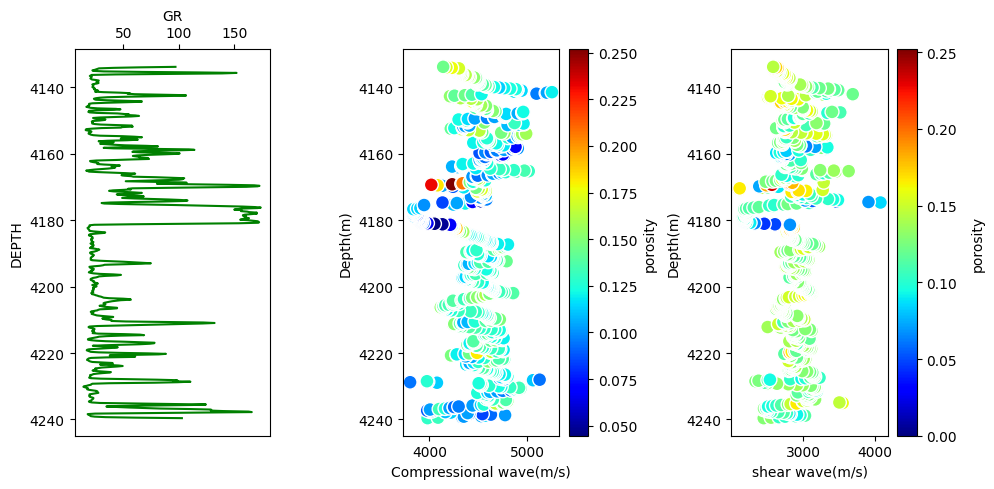

In [31]:
a=phi_t.min()
b=phi_t.max()
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.plot(data1.GR,data1.DEPTH,color='green')
plt.xlabel('GR');plt.ylabel('DEPTH')
plt.gca().invert_yaxis()
ax1=plt.gca()
ax1.xaxis.set_ticks_position("top")
ax1.xaxis.set_label_position("top")
    
plt.subplot(1,3,2)
plt.scatter(x=p,y=data1['DEPTH'],c=phi_t,marker='o',s=100,edgecolors='w',cmap='jet',vmin=a,vmax=b,alpha=1)
plt.xlabel('Compressional wave(m/s)');plt.ylabel('Depth(m)')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('porosity')

plt.subplot(1,3,3)
plt.scatter(x=s,y=data1['DEPTH'],c=phi_t,marker='o',s=100,edgecolors='w',cmap='jet',vmin=0,vmax=b,alpha=1)
plt.xlabel('shear wave(m/s)');plt.ylabel('Depth(m)')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('porosity',labelpad=10)

plt.tight_layout()

## calculate Rw by observation of log

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_11136\722690488.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,3), (0,0))
C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_11136\722690488.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax2.set_xlim(0,100)
C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_11136\722690488.py:21: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax2.set_xlim(0,100)


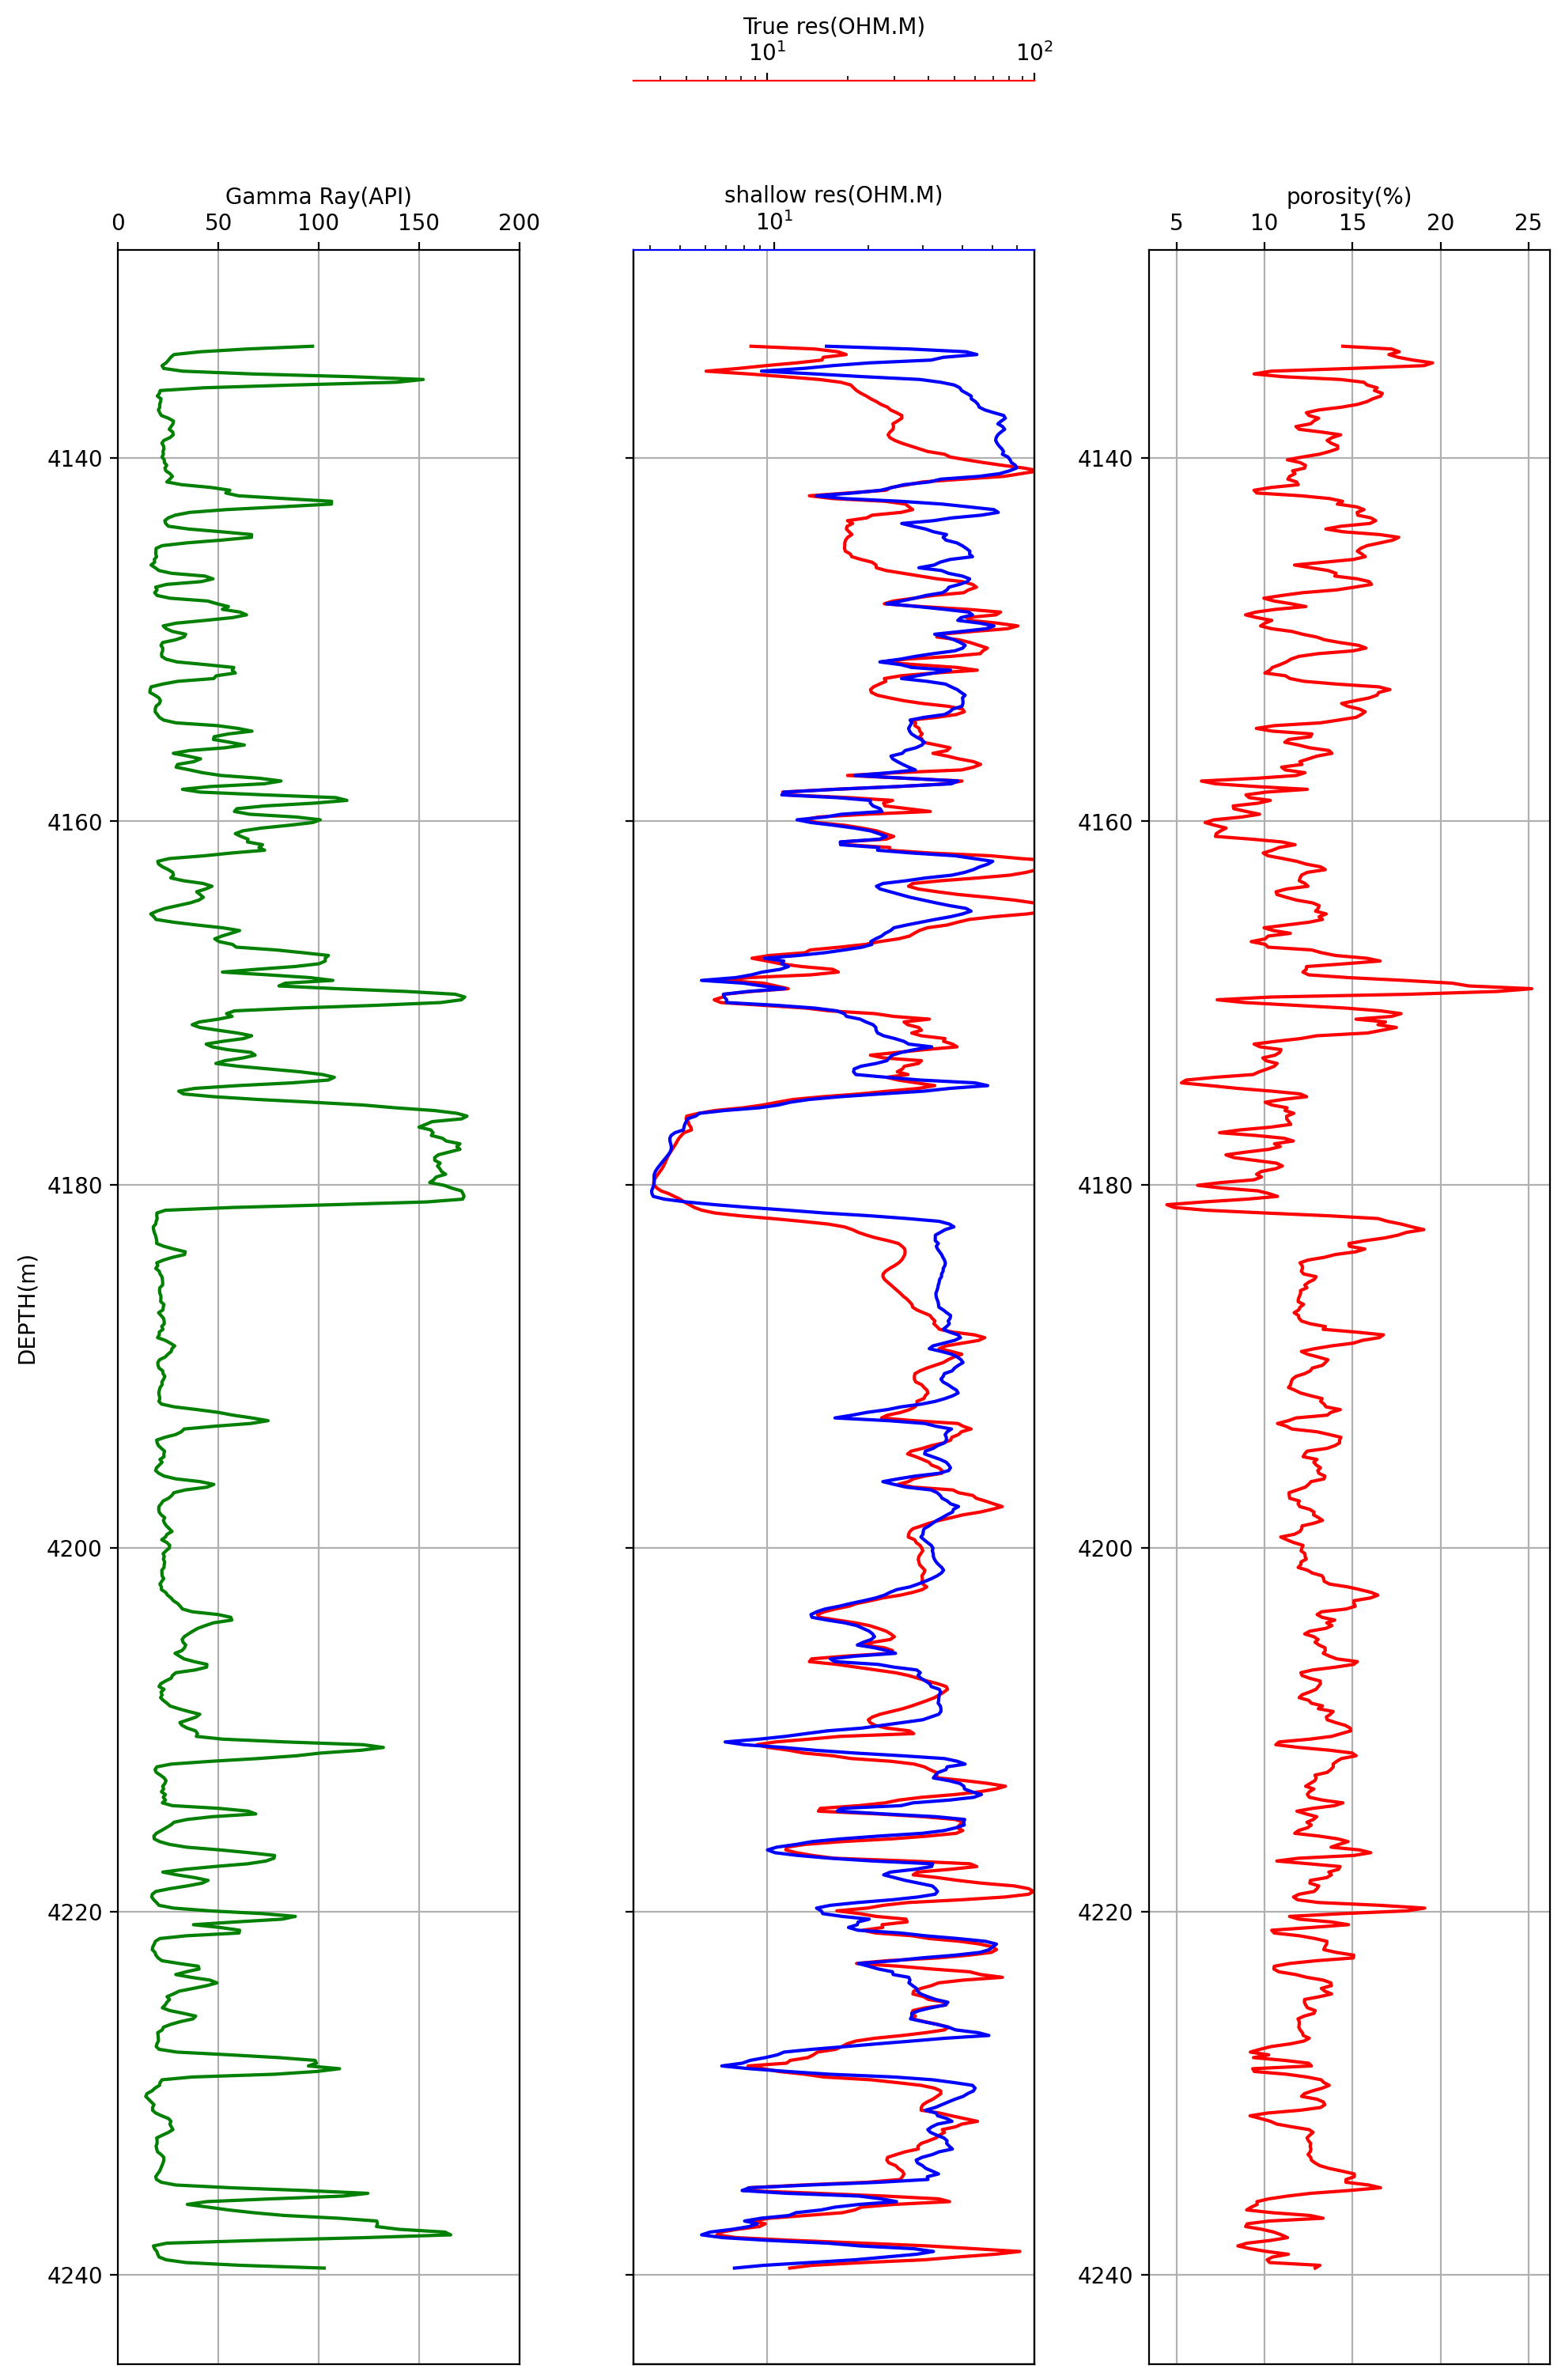

In [32]:
fig, axes = plt.subplots(figsize=(10,15),dpi=200)
ax1 = plt.subplot2grid((1,3), (0,0))
ax1.plot("GR", "DEPTH", data = data1, color = "green")
ax1.set_xlim(0, 200) 
ax1.invert_yaxis()
ax1.set_xlabel('Gamma Ray(API)')
ax1.set_ylabel('DEPTH(m)')

ax2 = plt.subplot2grid((1,3), (0,1))
ax2.plot(data2.ATRT,data2.DEPTH ,color = "red")
ax2.semilogx()
ax2.set_xlim(0,100)
ax2.invert_yaxis()
ax2.spines['top'].set_edgecolor('red')
ax2.set_xlabel('True res(OHM.M)')
ax2.grid()

ax3=ax2.twiny()
ax3.plot(data2.ATRX, data2.DEPTH, color = "blue")
ax3.semilogx()
ax2.set_xlim(0,100)
ax3.spines['top'].set_edgecolor('blue')
ax3.set_xlabel('shallow res(OHM.M)')
ax3.grid()

ax4 = plt.subplot2grid((1,3), (0,2))
ax4.plot(phi_t*100, data2["DEPTH"], color = "red")
ax4.set_xlabel('porosity(%)')
ax4.invert_yaxis()



for i, ax in enumerate(fig.axes):
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    
    
    if i == 1:
        ax.spines["top"].set_position(("axes", 1.08))
    else: 
        ax.grid(axis='both')
        
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
  

plt.tight_layout()

In [33]:
import plotly.subplots as sp
import plotly.graph_objects as go

phiB = data2['DPHI']
phiN = data2['APSC']
phiT = (phiB  + phiN )/2

fig = sp.make_subplots(rows=1, cols=3, shared_yaxes=True, horizontal_spacing=0.03)

fig.add_trace(go.Scatter(x=phiT, y=data2.DEPTH, line=dict(width=0.5, color='blue'), name='Total Porosity'), row=1, col=1)
fig.update_xaxes(title='Total Porosity', range=[0, 1], row=1, col=1)
fig.update_yaxes(title='Depth (m)', autorange='reversed', row=1, col=1)

fig.add_trace(go.Scatter(x=data1.GR, y=data2.DEPTH, line=dict(width=0.5, color='green'), name='Gamma Ray(API)'), row=1, col=2)
fig.update_xaxes(title='Gamma Ray(API)', row=1, col=2)

fig.add_trace(go.Scatter(x=data2.RT, y=data2.DEPTH, line=dict(width=0.5, color='blue'), name='Deep Resistivity'), row=1, col=3)
fig.add_trace(go.Scatter(x=data2.ATRX, y=data2.DEPTH, line=dict(width=0.5, color='red'), name='Shallow Resistivity', showlegend=False), row=1, col=3)
fig.update_xaxes(title='Deep and Shallow Resistivity', type='log', range=[0, 2], row=1, col=3)

fig.update_layout(height=1000, width=500, title_text='Logs to determine the Sw', showlegend=False)

fig.show()

In [34]:
#m=2
#depth=[4186.88,4200.6,4199.839,4229.4,4187.03]
#Rxo=[34.71,32.59,31.83,37.61,35.6]
#por_s=[0.12025,0.12375,0.1219,0.1338,0.11685]
#por_s=np.array(por_s)
#Rxo=np.array(Rxo)
#depth=np.array(depth)
#
#p=por_s.mean()
#r=Rxo.mean()
#d=depth.mean()
#Rwa=(p)**2*r
#Rwa

In [35]:
#fig1=px.line(data2,x='DEPTH',y='RT',range_x=[4133,4239])
#fig2=px.line(data2,x='ATRX',y='DEPTH',range_x=[4133,4239])
#fig1.show()
#fig2.show()
#fig.update_xaxes(rangeslider_visible=True

In [36]:
V_sh

3429    0.412705
3430    0.162900
3431    0.050016
3432    0.016751
3433    0.005884
          ...   
4119    0.024257
4120    0.029646
4121    0.076628
4122    0.179182
4123    0.371070
Name: GR, Length: 695, dtype: float64

In [37]:
print(phi_t)

229    0.12885
230    0.13150
231    0.10295
232    0.10155
233    0.10460
        ...   
919    0.17600
920    0.17070
921    0.17660
922    0.17230
923    0.14455
Length: 695, dtype: float64


## calculation 0f water saturation

In [38]:
data5 = data2[data2['DEPTH']<=4174]
data5 = data5[data5['DEPTH']>=4133.7]
data6 = data2[data2['DEPTH']>=4181]
data6 = data6[data6['DEPTH']<=4233]

In [39]:
data2

DEPTH     AF10     AF20     AF30     AF60     AF90    ANOR     AO10   
229  4239.6156   7.8559   8.3283   9.5637  11.3034  10.4259  9.7903   6.1343  \
230  4239.4632   9.6647  10.7881  11.4162  13.7657  12.7308  9.7929   7.1364   
231  4239.3108  12.8705  15.4494  14.8365  19.9233  18.2479  9.7899  16.1860   
232  4239.1584  18.0944  24.5437  19.3597  27.7033  25.0616  9.7923  31.9573   
233  4239.0060  26.1705  36.9702  24.9607  37.2607  32.5321  9.7897  55.7037   
..         ...      ...      ...      ...      ...      ...     ...      ...   
919  4134.4596  37.2636  32.3990  19.9611  19.4708  17.5347  9.7854  64.3529   
920  4134.3072  37.8827  42.2808  20.8970  20.3848  18.2252  9.7906  55.6351   
921  4134.1548  36.0564  29.7014  18.6569  17.8947  16.3945  9.7912  71.7064   
922  4134.0024  23.9875  19.4752  14.7473  14.0778  13.2000  9.7904  48.9744   
923  4133.8500  13.8348  11.7109  11.1948  10.9573  10.3651  9.7911  30.9583   

        AO20      AO30  ...    MURA      P1AZ     PEF    PEFL        RB   
229   6.7224    6.7603  ... -0.0618  312.1310  3.2674  3.3914   57.8962  \
230   9.8212    9.9546  ...  0.0032  312.2570  3.1205  3.4608   58.1252   
231  19.4093   21.5827  ...  0.1905  311.8747  3.2162  3.2700   57.5777   
232  35.4364   36.5186  ...  0.2575  312.1525  3.1577  3.1336   57.9440   
233  76.8734  106.9125  ...  0.2926  312.3638  3.1716  3.0345   58.0226   
..       ...       ...  ...     ...       ...     ...     ...       ...   
919  52.0266   38.4463  ...  0.4628   39.6783  3.1634  2.8574  215.6012   
920  67.1460   35.4395  ...  0.3389   41.3375  3.3197  2.7904  217.8704   
921  56.4668   60.9922  ...  0.2941   45.0813  3.2345  2.8163  222.1729   
922  32.5546   51.7725  ...  0.3853   48.1976  3.5722  2.8950  225.7394   
923  20.3872   29.0580  ...  0.8277   51.6233  4.3579  3.3561  229.8511   

       RHOB    RHOM       RT     SIGF    TENS  
229  2.6328  2.6332  10.7344  16.3196  6123.0  
230  2.5985  2.5616  12.1522  14.1791  6213.0  
231  2.5720  2.5136  20.3859  10.4661  6214.0  
232  2.5497  2.4913  37.9122   8.7821  6272.0  
233  2.5414  2.4826  43.9652   8.4438  6202.0  
..      ...     ...      ...      ...     ...  
919  2.3655  2.4200  22.7981  11.3359  6117.0  
920  2.3753  2.4094  36.9384  11.0281  6168.0  
921  2.4277  2.4127  32.9731  12.1152  6181.0  
922  2.4920  2.4215  25.9278  13.4702  6149.0  
923  2.5531  2.4604  13.1605  13.6075  6140.0  

[695 rows x 62 columns]

In [40]:
data2['phi_t'] = pd.Series(phi_t)
data3=data2[(data6.DEPTH>=4200)&(data2.DEPTH<=4201)]

In [41]:
p15 = data1['GR'].quantile(0.05)
p195 = data1['GR'].quantile(0.95)
Igr=(data1['GR']-p15)/(p195-p15) #volume of shale
V_sh=1.7-(3.38-(Igr+0.7)**2)**(1/2)
V_sh

3429    0.412705
3430    0.162900
3431    0.050016
3432    0.016751
3433    0.005884
          ...   
4119    0.024257
4120    0.029646
4121    0.076628
4122    0.179182
4123    0.371070
Name: GR, Length: 695, dtype: float64

In [42]:
Rt=data3['ATRX'].mean()
Rt

32.66806666666667

In [43]:
phi=data3['phi_t'].mean()
phi

0.12201666666666666

In [44]:
Rw=Rt*(phi)**2
print(Rw)


0.4863643634789074


In [45]:
Rw=0.4

## archie's law

In [46]:
import numpy as np
Sw=np.sqrt(Rw/((phi_t)**2*data2.ATRT))
Sw

229    1.408039
230    1.252856
231    1.287010
232    1.000176
233    0.842474
         ...   
919    0.892236
920    0.833666
921    0.834967
922    0.944427
923    1.482528
Length: 695, dtype: float64

In [63]:
a=1
m=2
n=2
Rw=0.4
Res_Flag=[]
dff=pd.DataFrame(zip(phi_t))
dff.rename(columns={0:'Total_Porosity'},inplace=True) 

'''Water Saturation calculation'''

Sw=(a*Rw/(data2['RT']*data2['phi_t']**m))**(1/n)  #Archie's Formula of Water Saturation
Sw

229    1.498155
230    1.379675
231    1.360626
232    1.011488
233    0.911893
         ...   
919    0.752607
920    0.609618
921    0.623677
922    0.720878
923    1.206079
Length: 695, dtype: float64

In [48]:
vsh=np.array(V_sh)
Sw= np.array(Sw)
phi_t = np.array(phi_t)
#Sw

In [49]:
Sw1 = []
for i in range(len(Sw)):
    if Sw[i]>=1.0:
        Sw1.append(1)
    else:
        Sw1.append(Sw[i])
        
#Sw1        
        

In [50]:
#plt.plot(Sw1,data2.DEPTH,color='blue')
#plt.gca().invert_yaxis()
#plt.xlabel('water saturation')
#plt.ylabel('Depth')

## flagging 0f reservoir zone

In [64]:
#vsh=np.array(V_sh)
sw= np.array(Sw1)
#phi_t = np.array(phi_t)
sw.min()

0.47930274271883966

In [52]:
res_flag = []
for i in range(len(data2['DEPTH'])):
    if vsh[i] <= 0.4 and sw[i]<=0.7:
        res_flag.append(1)
    else:
        res_flag.append(0)

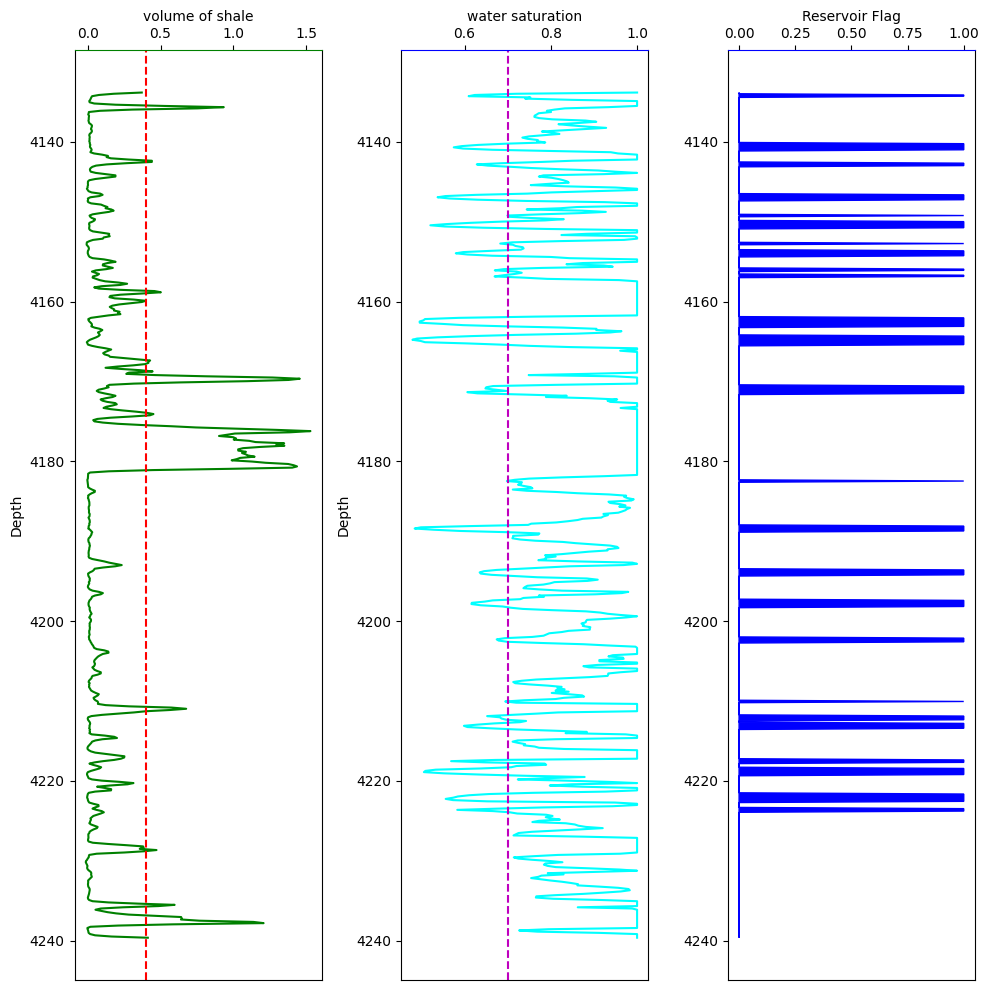

In [99]:
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.plot(vsh,data2.DEPTH,color='green')
plt.gca().invert_yaxis()
plt.axvline(0.4,color='r',ls='--')
ax1=plt.gca()
ax1.spines['top'].set_edgecolor('green')
plt.xlabel('volume of shale')
plt.ylabel('Depth')
ax1.xaxis.set_ticks_position("top")
ax1.xaxis.set_label_position("top")
        
       
plt.subplot(132)
plt.plot(sw,data2.DEPTH,color='cyan')
plt.gca().invert_yaxis()
plt.xlabel('water saturation')
plt.axvline(0.7,color='m',ls='--')
plt.ylabel('Depth') 
ax2=plt.gca()
ax2.spines['top'].set_edgecolor('blue')
ax2.xaxis.set_ticks_position("top")
ax2.xaxis.set_label_position("top")
        

plt.subplot(133)
plt.fill(res_flag,data2.DEPTH,color='blue')
plt.gca().invert_yaxis()
ax3=plt.gca()
ax3.spines['top'].set_edgecolor('blue')
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")
        
plt.xlabel("Reservoir Flag")

plt.tight_layout()

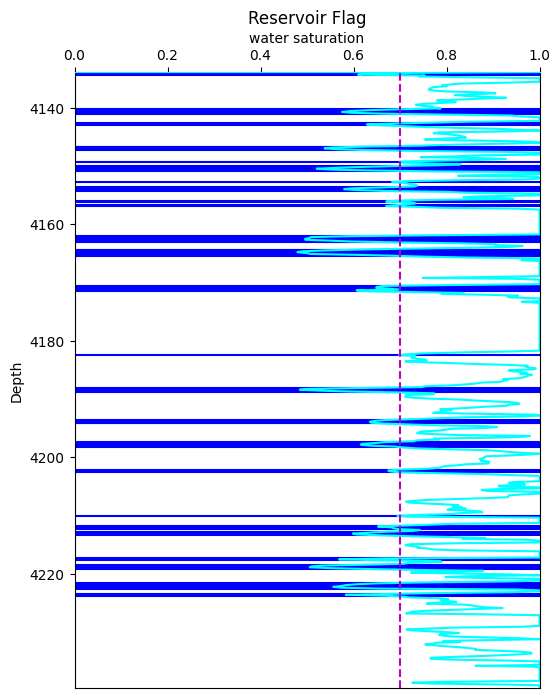

In [97]:


# Create a new figure and set its size
fig = plt.figure(figsize=(6, 8))

# Iterate over each row in the DataFrame
for i in range(len(data2['DEPTH'])):
    # Check if the condition is satisfied at this depth
    if (vsh[i] <= 0.4) and (sw[i] <= 0.7):
        # If the condition is satisfied, plot a line from x=0 to x=1 at this depth
        plt.plot([0, 1], [data2['DEPTH'].iloc[i], data2['DEPTH'].iloc[i]], color='blue')
        
# Set the y-axis limits to be the same as the depth range in the DataFrame
plt.ylim(data2['DEPTH'].max(), data2['DEPTH'].min())

# Set the x-axis limits to be 0 to 1
plt.xlim(0, 1)
plt.gca().invert_yaxis()

# Label the axes
plt.xlabel('Flag')
plt.ylabel('Depth')
plt.title('Reservoir Flag')



plt.plot(sw,data2.DEPTH,color='cyan')
plt.gca().invert_yaxis()
plt.xlabel('water saturation')
plt.axvline(0.7,color='m',ls='--')
plt.ylabel('Depth') 
ax2=plt.gca()
ax2.spines['top'].set_edgecolor('cyan')
ax2.xaxis.set_ticks_position("top")
ax2.xaxis.set_label_position("top")
        


plt.show()

## claculation std deviation ,max,mean

In [82]:
vol_sh = []
wat_sat = []
tot_por = []
for i in range(len(res_flag)):
    if res_flag[i] == 1:
        vol_sh.append(vsh[i])
        wat_sat.append(sw[i])
        tot_por.append(phi_t[i])
df_report = pd.DataFrame(zip(vol_sh,wat_sat,tot_por),columns = ['Volume of Shale','Water of Saturation','Total Porosity'])        

In [83]:
df_report

Volume of Shale  Water of Saturation  Total Porosity
0           0.095797             0.665378         0.13340
1           0.059757             0.583214         0.12400
2           0.032671             0.676220         0.11780
3           0.004376             0.652836         0.15050
4           0.001009             0.573475         0.15075
..               ...                  ...             ...
101         0.014962             0.593360         0.12285
102         0.017825             0.631789         0.12330
103         0.014180             0.696114         0.12020
104         0.029646             0.609618         0.17070
105         0.076628             0.623677         0.17660

[106 rows x 3 columns]

In [84]:
df_report['Volume of Shale'].std()

0.04481154857348336

In [85]:
df_report.describe()

Volume of Shale  Water of Saturation  Total Porosity
count       106.000000           106.000000      106.000000
mean          0.031825             0.616585        0.139490
std           0.044812             0.062447        0.017807
min          -0.007404             0.479303        0.097800
25%           0.003594             0.574154        0.125650
50%           0.014798             0.630042        0.135425
75%           0.040531             0.668619        0.152312
max           0.267875             0.699442        0.190550